<a href="https://colab.research.google.com/github/Pritishcoder07/AIMLP/blob/main/REAL_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install gradio


In [9]:
import numpy as np
import pandas as pd
import gradio as gr
import matplotlib.pyplot as plt

In [10]:
from google.colab import files
uploaded = files.upload()

Saving attendance_100_real_names.csv to attendance_100_real_names (1).csv


In [11]:
Attendace = pd.read_csv('attendance_100_real_names.csv')

In [12]:
Attendace

,RollNo,Name,Total_Classes,Attended_Classes
0,101,Aarav Sharma,180,165
1,102,Vivaan Verma,180,140
2,103,Aditya Singh,180,150
3,104,Arjun Patel,180,170
4,105,Rohan Gupta,180,120
...,...,...,...,...
95,196,Ashwin Iyer,180,165
96,197,Harshit Goyal,180,155
97,198,Naveen Reddy,180,145
98,199,Pranav Deshmukh,180,150


In [13]:
Attendace["Attendance_Percentage"] = (
    Attendace["Attended_Classes"] / Attendace["Total_Classes"]
) * 100

Attendace

,RollNo,Name,Total_Classes,Attended_Classes,Attendance_Percentage
0,101,Aarav Sharma,180,165,91.666667
1,102,Vivaan Verma,180,140,77.777778
2,103,Aditya Singh,180,150,83.333333
3,104,Arjun Patel,180,170,94.444444
4,105,Rohan Gupta,180,120,66.666667
...,...,...,...,...,...
95,196,Ashwin Iyer,180,165,91.666667
96,197,Harshit Goyal,180,155,86.111111
97,198,Naveen Reddy,180,145,80.555556
98,199,Pranav Deshmukh,180,150,83.333333


In [14]:
low_attendance = Attendace[Attendace["Attendance_Percentage"] < 75]
low_attendance


,RollNo,Name,Total_Classes,Attended_Classes,Attendance_Percentage
4,105,Rohan Gupta,180,120,66.666667
9,110,Nikhil Yadav,180,110,61.111111
13,114,Deepak Choudhary,180,100,55.555556
24,125,Kavita Gupta,180,120,66.666667
29,130,Ayesha Khan,180,130,72.222222


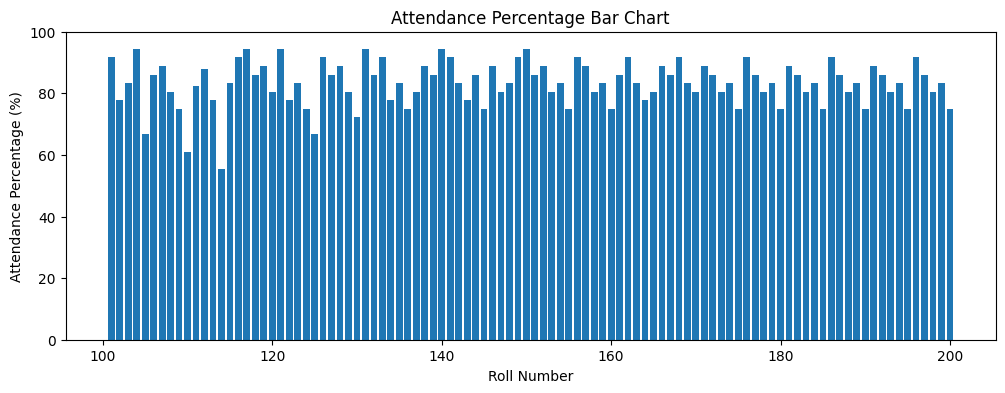

In [18]:
plt.figure(figsize=(12,4))
plt.bar(Attendace["RollNo"], Attendace["Attendance_Percentage"])
plt.xlabel("Roll Number")
plt.ylabel("Attendance Percentage (%)")
plt.title("Attendance Percentage Bar Chart")
plt.ylim(0, 100)
plt.show()



In [23]:
def attendance_analysis(file):
    # Read uploaded CSV
    df = pd.read_csv(file.name)

    # Calculate attendance percentage
    df["Attendance_Percentage"] = (
        df["Attended_Classes"] / df["Total_Classes"]
    ) * 100

    # Detect low attendance students (<75%)
    low_attendance = df[df["Attendance_Percentage"] < 75]

    # Create bar chart (X-axis = Roll Number)
    plt.figure(figsize=(12,4))
    plt.bar(df["RollNo"], df["Attendance_Percentage"])
    plt.xlabel("Roll Number")
    plt.ylabel("Attendance Percentage (%)")
    plt.title("Attendance Percentage Bar Chart")
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.savefig("attendance_bar_chart.png")
    plt.close()

    return df, low_attendance, "attendance_bar_chart.png"


In [24]:
interface = gr.Interface(
    fn=attendance_analysis,
    inputs=gr.File(label="Upload Attendance CSV"),
    outputs=[
        gr.Dataframe(label="Attendance Data with Percentage"),
        gr.Dataframe(label="Low Attendance Students (<75%)"),
        gr.Image(label="Attendance Bar Chart")
    ],
    title="College Attendance Analytics System",
    description="Upload CSV file to analyze attendance percentage and visualize trends."
)


In [25]:
interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6296fa2e4ee033d165.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
